In [14]:
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

Create data

In [15]:
T = 100
x_axis = np.linspace(0, 2 * np.pi, T)
y_axis = np.sin(x_axis)

Get the training data

In [16]:
N = 30
idx = np.random.choice(T, size=N, replace=False)
X_train = x_axis[idx].reshape((N, 1))
Y_train = y_axis[idx]

Single decision tree

In [17]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
prediction = model.predict(x_axis.reshape(T, 1))
s_score = model.score(x_axis.reshape(T, 1), y_axis)
print("Score for single decision tree:", s_score)

Score for single decision tree: 0.9886569257250073


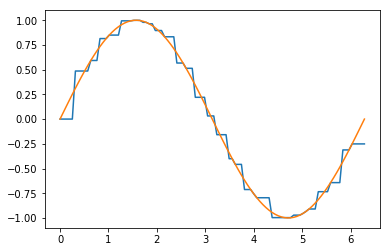

In [20]:
sns.lineplot(x=x_axis, y=prediction)
sns.lineplot(x=x_axis, y=y_axis)

Bagging

In [31]:
class BaggedTreeRegressor(object):
    def __init__(self, B):
        self.B = B
        self.models = []
    
    def fit(self, X, Y):
        N = len(X)
        for b in range(self.B):
            idx = np.random.choice(N, size=N, replace=True)
            Xb = X[idx]
            Yb = Y[idx]
            
            model = DecisionTreeRegressor()
            model.fit(Xb, Yb)
            self.models.append(model)
    
    def predict(self, X):
        predictions = np.zeros(len(X))
        for model in self.models:
            predictions += model.predict(X)
        return predictions / self.B
    
    def score(self, X, Y):
        d1 = Y - self.predict(X)
        d2 = Y - Y.mean()
        return 1 - d1.dot(d1) / d2.dot(d2)

In [34]:
model = BaggedTreeRegressor(200)
model.fit(X_train, Y_train)
print("Score for bagged tree:", model.score(x_axis.reshape(T, 1), y_axis))
prediction = model.predict(x_axis.reshape(T, 1))

Score for bagged tree: 0.990386223216188


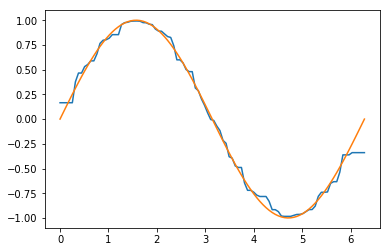

In [33]:
sns.lineplot(x_axis, prediction)
sns.lineplot(x_axis, y_axis)
